# 03_Model_Benchmarks

## Import Libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import  StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


from sklearn.metrics import mean_squared_error

## Load in dataset

In [2]:
df = pd.read_csv('./datasets/transformed_train.csv')

In [3]:
nominal_features = ['has_remod', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl',
       'House Style_2Story', 'House Style_Split', 'Central Air_Y',
       'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
       'Bedroom AbvGr_>=4', 'TotRms AbvGrd_6', 'TotRms AbvGrd_7',
       'TotRms AbvGrd_<=4', 'TotRms AbvGrd_>=8', 'Mo Sold_spring',
       'Mo Sold_summer', 'Mo Sold_winter', 'Yr Sold_2007', 'Yr Sold_2008',
       'Yr Sold_2009', 'Yr Sold_2010', 'total_baths_1', 'total_baths_2',
       'total_baths_>=3']

cont_features = ['lot_area_frontage', 'Mas Vnr Area', 'Total Bsmt SF',
       'Gr Liv Area', 'Garage Area', 'outdoor_SF', 'age_since_remodel',
       'age_since_built', 'Heating QC', 'house_exter_score', 'fireplace_score',
       'garage_basement_score', 'kitchen_score']



In [4]:
df.head()

,Unnamed: 0,has_remod,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,House Style_2Story,House Style_Split,Central Air_Y,Bedroom AbvGr_1,Bedroom AbvGr_2,...,Garage Area,outdoor_SF,age_since_remodel,age_since_built,Heating QC,house_exter_score,fireplace_score,garage_basement_score,kitchen_score,SalePrice
0,0,1,0,0,1,1,0,1,0,0,...,475.0,44,5,34,5,98,0,0.00,4,130500
1,1,1,0,0,1,1,0,1,0,0,...,559.0,74,12,13,5,84,3,0.00,4,220000
2,2,1,0,0,1,0,0,1,0,0,...,246.0,52,3,57,3,84,0,49.00,4,109000
3,3,1,0,0,1,1,0,1,0,0,...,400.0,100,3,4,4,60,0,20.25,3,174000
4,4,1,0,0,1,0,0,1,0,0,...,484.0,59,17,110,3,84,0,12.25,3,138500


In [5]:
# drop unnamed
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
y = df['SalePrice']
features = [col for col in df.columns if col != 'SalePrice']
X = df[features]

# Train Test Split

In [7]:
X.isnull().sum().sort_values(ascending=False).head()

lot_area_frontage    330
Mas Vnr Area          22
Total Bsmt SF          1
Garage Area            1
TotRms AbvGrd_>=8      0
dtype: int64

In [8]:
# generate new test and train data

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [10]:
x_train.describe()

,has_remod,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,House Style_2Story,House Style_Split,Central Air_Y,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,...,Gr Liv Area,Garage Area,outdoor_SF,age_since_remodel,age_since_built,Heating QC,house_exter_score,fireplace_score,garage_basement_score,kitchen_score
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.452962,0.043902,0.020906,0.895470,0.298955,0.066899,0.933101,0.037631,0.268990,0.539373,...,1493.616725,473.314286,158.942857,23.665505,35.892683,4.131707,76.227178,1.982578,16.799369,3.627875
std,0.497956,0.204949,0.143119,0.306053,0.457960,0.249934,0.249934,0.190368,0.443589,0.498621,...,509.845159,217.657183,154.516187,20.938667,30.144347,0.976040,17.389418,2.269893,19.526721,0.829749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1125.000000,312.500000,25.000000,4.000000,7.000000,3.000000,66.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1432.000000,478.000000,140.000000,16.000000,33.000000,5.000000,77.000000,1.000000,12.250000,4.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1718.500000,577.000000,244.000000,44.000000,54.000000,5.000000,84.000000,4.000000,20.250000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5642.000000,1418.000000,1166.000000,60.000000,136.000000,5.000000,190.000000,12.000000,169.000000,9.000000


In [11]:
si = SimpleImputer(missing_values=np.nan,strategy='median')
x_train_imputed = si.fit_transform(x_train[features])
x_test_imputed = si.transform(x_test[features])

In [12]:
x_train_imputed = pd.DataFrame(x_train_imputed,columns=features).copy()
x_test_imputed = pd.DataFrame(x_test_imputed,columns=features).copy()

In [13]:
# scale only numerical variables

x_train_scaled_numerical = x_train_imputed[cont_features].copy()
x_test_scaled_numerical = x_test_imputed[cont_features].copy()

In [14]:
ss = StandardScaler()
x_train_scaled_numerical = ss.fit_transform(x_train_scaled_numerical)
x_test_scaled_numerical = ss.transform(x_test_scaled_numerical)

In [15]:
x_train_scaled_numerical = pd.DataFrame(x_train_scaled_numerical,columns=cont_features).copy()
x_test_scaled_numerical = pd.DataFrame(x_test_scaled_numerical,columns=cont_features).copy()

In [18]:
x_train_transformed = x_train_scaled_numerical.join(x_train[nominal_features])
x_test_transformed = x_test_scaled_numerical.join(x_test[nominal_features])

### Create Standardised Functions

In [30]:
def draw_plot(predicted_y,target_y):
    
    ax = sns.regplot(x=predicted_y,y=target_y)
    ax.set(xlabel='predicted y', ylabel='ground truth')
    plt.show()

In [215]:
def metrics_printout(estimator,x_test=None,y_test=None,y_predict=None):
    
    
    print("R2 Correlation Score :{}".format(estimator.score(x_test,y_test)))
#     print("Number of Coefficients : {}".format(estimator.coef_.shape))
    
    print("RMSE is : {}".format(np.sqrt(mean_squared_error(y_test,y_predict))))


In [140]:
def estimator_scaled_coefficients(estimator,column_names):
    coefficients = estimator.coef_
    
    s = StandardScaler()
    trnsfrm_coef = s.fit_transform(coefficients.reshape(-1,1))
    
    coef_dict = pd.DataFrame(zip(column_names,trnsfrm_coef.reshape(1,-1)[0]),columns=['feature','coefficient'])
    
    
    return coef_dict

## Linear Model 

In [20]:
lr = LinearRegression()

In [22]:
benchmark = lr.fit(x_train_transformed,y_train)

In [26]:
y_predicted_benchmark = lr.predict(x_test_transformed)

In [29]:
metrics_printout(benchmark,x_test_transformed,y_test,y_predicted_benchmark)

R2 Correlation Score :0.8483097680645612
Number of Coefficients : (38,)
RMSE is : 30111.746640758833


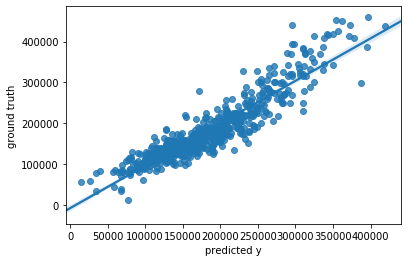

In [33]:
draw_plot(y_predicted_benchmark,y_test)

In [141]:
estimator_scaled_coefficients(benchmark,x_test_transformed.columns).sort_values(by='coefficient').head()

,feature,coefficient
22,Bedroom AbvGr_3,-2.388356
21,Bedroom AbvGr_2,-2.354578
23,Bedroom AbvGr_>=4,-2.073876
20,Bedroom AbvGr_1,-1.752250
7,age_since_built,-0.884442


## Linear Model with Cross Validation

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(lr, x_train_transformed, y_train, cv=kf).mean()

0.7451742322295176

## Regularisation - Ridge

In [415]:
ridge_model = Ridge()


In [416]:
ridge_baseline = ridge_model.fit(x_train_transformed,y_train)

In [417]:
y_predict_ridge_baseline = ridge_baseline.predict(x_test_transformed)

In [418]:
metrics_printout(ridge_baseline,x_test_transformed,y_test,y_predict_ridge_baseline)

R2 Correlation Score :0.8492224168730136
RMSE is : 30021.025867575314


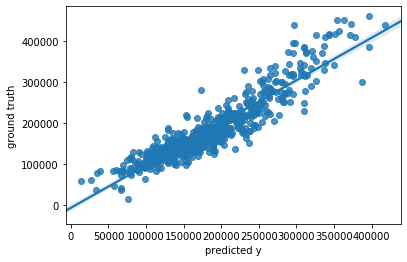

In [419]:
draw_plot(y_predict_ridge_baseline,y_test)

We will use hyperparamter optimisation in the form of `RandomizedSearchCV` for all the estimators

In [319]:
r_alphas = np.logspace(0, 20, 1000)

In [320]:
params = {
    'alpha':r_alphas
}

In [321]:
random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=params,cv=5,n_iter=50)

In [322]:
ridge_search = random_search_ridge.fit(x_train_transformed,y_train)

In [323]:
ridge_search.best_score_

0.7594142521894662

In [324]:
best_alpha = ridge_search.best_params_['alpha']

Get coefficients for particular alpha in ridge

In [325]:
ridge_run = Ridge(alpha=best_alpha)

In [326]:
ridge_result = ridge_run.fit(x_train_transformed,y_train)

In [327]:
y_predict_ridge = ridge_result.predict(x_test_transformed)

In [328]:
metrics_printout(ridge_result,x_test_transformed,y_test,y_predict_ridge)

R2 Correlation Score :0.8497365831766395
RMSE is : 29969.794837527148


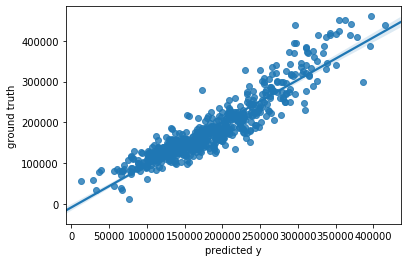

In [268]:
draw_plot(y_predict_ridge,y_test)

## Regularisation - Lasso

In [355]:
lm = Lasso(max_iter = 10000, tol=0.00001)


In [356]:
l_alphas = np.linspace(0.001, 0.5, 10000)

In [357]:
params = {
    'alpha':l_alphas
}

In [358]:
random_search_lasso = RandomizedSearchCV(estimator=lm, param_distributions=params,cv=5,n_iter=50)

In [359]:
lasso_search = random_search_lasso.fit(x_train_transformed,y_train)

In [360]:
lasso_search.best_score_

0.7597634065035623

In [363]:
best_alpha_lasso= lasso_search.best_params_['alpha']

In [364]:
lasso_run = Lasso(alpha=best_alpha_lasso,max_iter = 10000, tol=0.0001)

In [365]:
lasso_result = lasso_run.fit(x_train_transformed,y_train)

In [366]:
lasso_result.score(x_test_transformed,y_test)

0.8483112996955426

In [367]:
coefficients = lasso_result.coef_

In [368]:
y_predict_lasso = lasso_run.predict(x_test_transformed)

In [369]:
metrics_printout(lasso_result,x_test_transformed,y_test,y_predict_lasso)

R2 Correlation Score :0.8483112996955426
RMSE is : 30111.594619762192


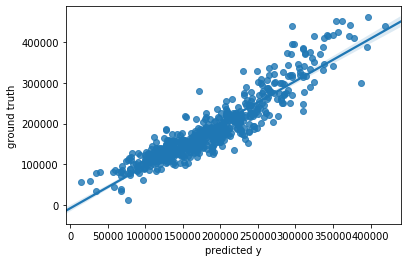

In [370]:
draw_plot(y_predict_lasso,y_test)

In [185]:
dict(zip(x_test_transformed.columns,coefficients))

{'lot_area_frontage': -6589.1667866760445,
 'Mas Vnr Area': 7417.098911973069,
 'Total Bsmt SF': 9333.602300703626,
 'Gr Liv Area': 22176.561641995762,
 'Garage Area': 10399.883110452563,
 'outdoor_SF': 3624.643753874728,
 'age_since_remodel': -951.9789983965605,
 'age_since_built': -16735.33846919169,
 'Heating QC': 3422.3413333030203,
 'house_exter_score': 21238.91100325449,
 'fireplace_score': 8836.156271408701,
 'garage_basement_score': 372.5571233209103,
 'kitchen_score': 1295.3661012651696,
 'has_remod': 5293.401469394917,
 'Land Contour_HLS': 47757.76272089526,
 'Land Contour_Low': 22205.757807285303,
 'Land Contour_Lvl': 11811.395090263903,
 'House Style_2Story': -12969.853108625277,
 'House Style_Split': -3833.472070501838,
 'Central Air_Y': -11943.32703687298,
 'Bedroom AbvGr_1': -11699.257857313869,
 'Bedroom AbvGr_2': -23686.884277181223,
 'Bedroom AbvGr_3': -24263.829549742633,
 'Bedroom AbvGr_>=4': -17586.965849885564,
 'TotRms AbvGrd_6': 1365.8148666668228,
 'TotRms AbvG

In [308]:
estimator_scaled_coefficients(lasso_result,x_test_transformed.columns).sort_values(by='coefficient',ascending=False)

,feature,coefficient
14,Land Contour_HLS,3.483038
15,Land Contour_Low,1.556561
3,Gr Liv Area,1.554360
9,house_exter_score,1.483666
16,Land Contour_Lvl,0.772884
4,Garage Area,0.666464
27,TotRms AbvGrd_>=8,0.611330
37,total_baths_>=3,0.595746
2,Total Bsmt SF,0.586073
10,fireplace_score,0.548568


## Regression - Elastic Net

In [426]:
enet_alphas = np.arange (0.1,1.0,0.005)
enet_ratios = np.arange(0.0,1.0,0.01)

enet_params = {
    'alpha' : enet_alphas,
    'l1_ratio' : enet_ratios
}

enet_model = ElasticNet(random_state=42)

In [427]:
enet_random_search = RandomizedSearchCV(estimator=enet_model, param_distributions=enet_params,cv=5,n_iter=50)

In [428]:
enet_optimal_search = enet_random_search.fit(x_train_transformed,y_train)

In [429]:
enet_optimal_search.best_params_

{'l1_ratio': 0.99, 'alpha': 0.29500000000000015}

In [430]:
y_predict_enet = enet_optimal_search.predict(x_test_transformed)

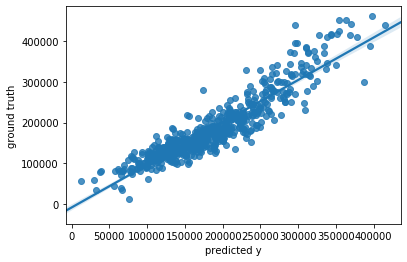

In [431]:
draw_plot(y_predict_enet,y_test)

In [432]:
enet_optimal_search.score(x_test_transformed,y_test)

0.8501862867601218

In [433]:
metrics_printout(enet_optimal_search,x_test_transformed,y_test,y_predict_enet)

R2 Correlation Score :0.8501862867601218
RMSE is : 29924.914908287294


## Model Summaries

| Model         | $R^2$ Score          |RMSE  |
| ------------- |---------------|------|
| Linear Regression (Benchmark)     | 0.84830 | 30111 |
| Ridge                  | 0.85112      |    29830 |
| Lasso                  | 0.84924      |    30018 |
| ElasticNet             | 0.85099      |    29924 |

As seen from the summary, ElasticNet and Ridge regression offers very similar performance - better than the benchmark.

Even with hyperparameter tuning via RandomSearch, there isn't much improvement observed.

However, it is noted that 38 features define the model. We may want to explore feature elimination methods in 04_Model_Tuning